Jan Schmidt I6079633

In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn 
sklearn.__version__

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

from sklearn.cluster import  DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# **Task 1**

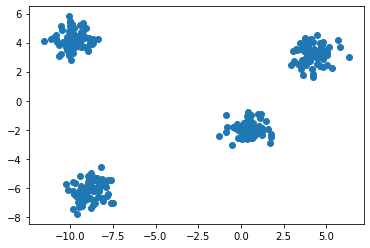

In [3]:
r_num = 0
#blobs method 1
X, y = make_blobs(n_samples=[75,75,75,75],n_features=2, cluster_std=0.6)#, random_state=r_num)
#blobs method 2
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=r_num)
plt.scatter(X[:,0],X[:,1]);

4 clearly differentiatiable clusters can be seen

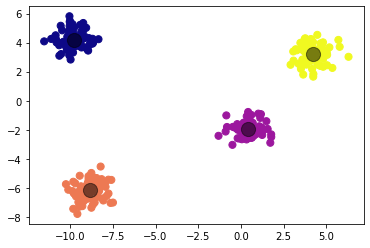

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Using KMeans with a k = 4 gives a flawless result where all 4 clusters are seperated

In [5]:
#Confusion map for the model
def draw_confusion_matrix(ax,conf_mat):
  class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

  im = ax.imshow(conf_mat,cmap='Blues')

  ax.set_xticklabels(class_names)
  ax.set_xticks(np.arange(conf_mat.shape[1]))

  ax.set_yticklabels(class_names)
  ax.set_yticks(np.arange(conf_mat.shape[0]))

  for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        text = ax.text(j, i, conf_mat[i, j], color="black")

  return ax;
  
def performKMeansEvaluation(k,X,y):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)
  centers = kmeans.cluster_centers_
  cm = contingency_matrix(y,y_kmeans)

  sse = 0
  for i in range(len(X)):
    center = centers[y_kmeans[i]]
    sse += (X[i, 0] - center[0]) ** 2 + (X[i, 1] - center[1]) ** 2
      
  return centers, y_kmeans, cm, sse


def performMultiKMeans(X,y,start=1,end=10,sse = []):
  ess = end-start+1 #Evaluation Sample Size
  fig, axs = plt.subplots(ess, 2, figsize=(16, 4*ess))
  for k in range(start, end+1):
    centers, y_k, con_mat, n_sse = performKMeansEvaluation(k,X,y)
    sse.append(n_sse)
    if (ess <= 1):
      axs[0].scatter(X[:, 0], X[:, 1], c=y_k, s=50, cmap='plasma')
      axs[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
      draw_confusion_matrix(axs[1], con_mat)
    else:
      axs[k-start,0].scatter(X[:, 0], X[:, 1], c=y_k, s=50, cmap='plasma')
      axs[k-start,0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
      draw_confusion_matrix(axs[k-start,1], con_mat)
  
  fig.tight_layout()
  plt.show()
  return sse


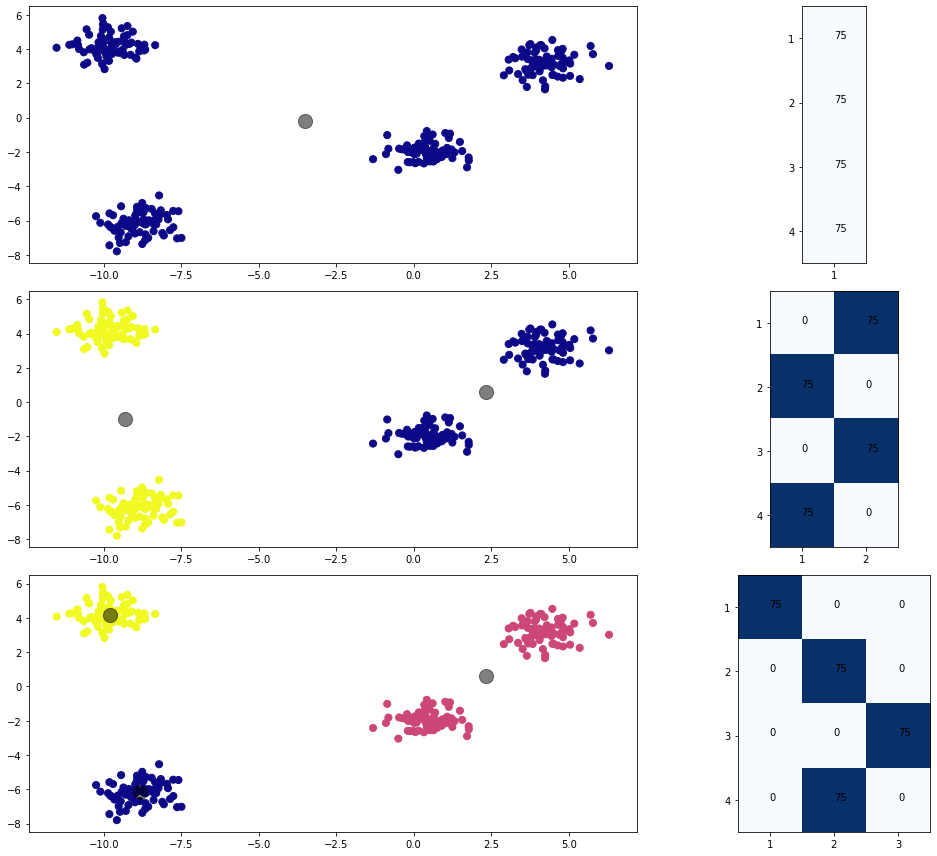

In [6]:
total_sse = performMultiKMeans(X,y,end=3);

With a k <= 3  some of the seperate clusters are labled as one. 

This comes from the limitation of clustes. When not enought clusters are defined they can not be seperated as such.

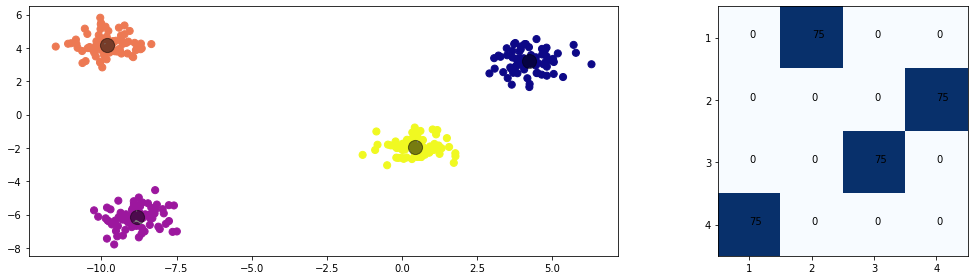

In [7]:
total_sse = performMultiKMeans(X,y,start=4,end=4,sse=total_sse);

Here as confirmation KMeans with k = 4 performs perfect

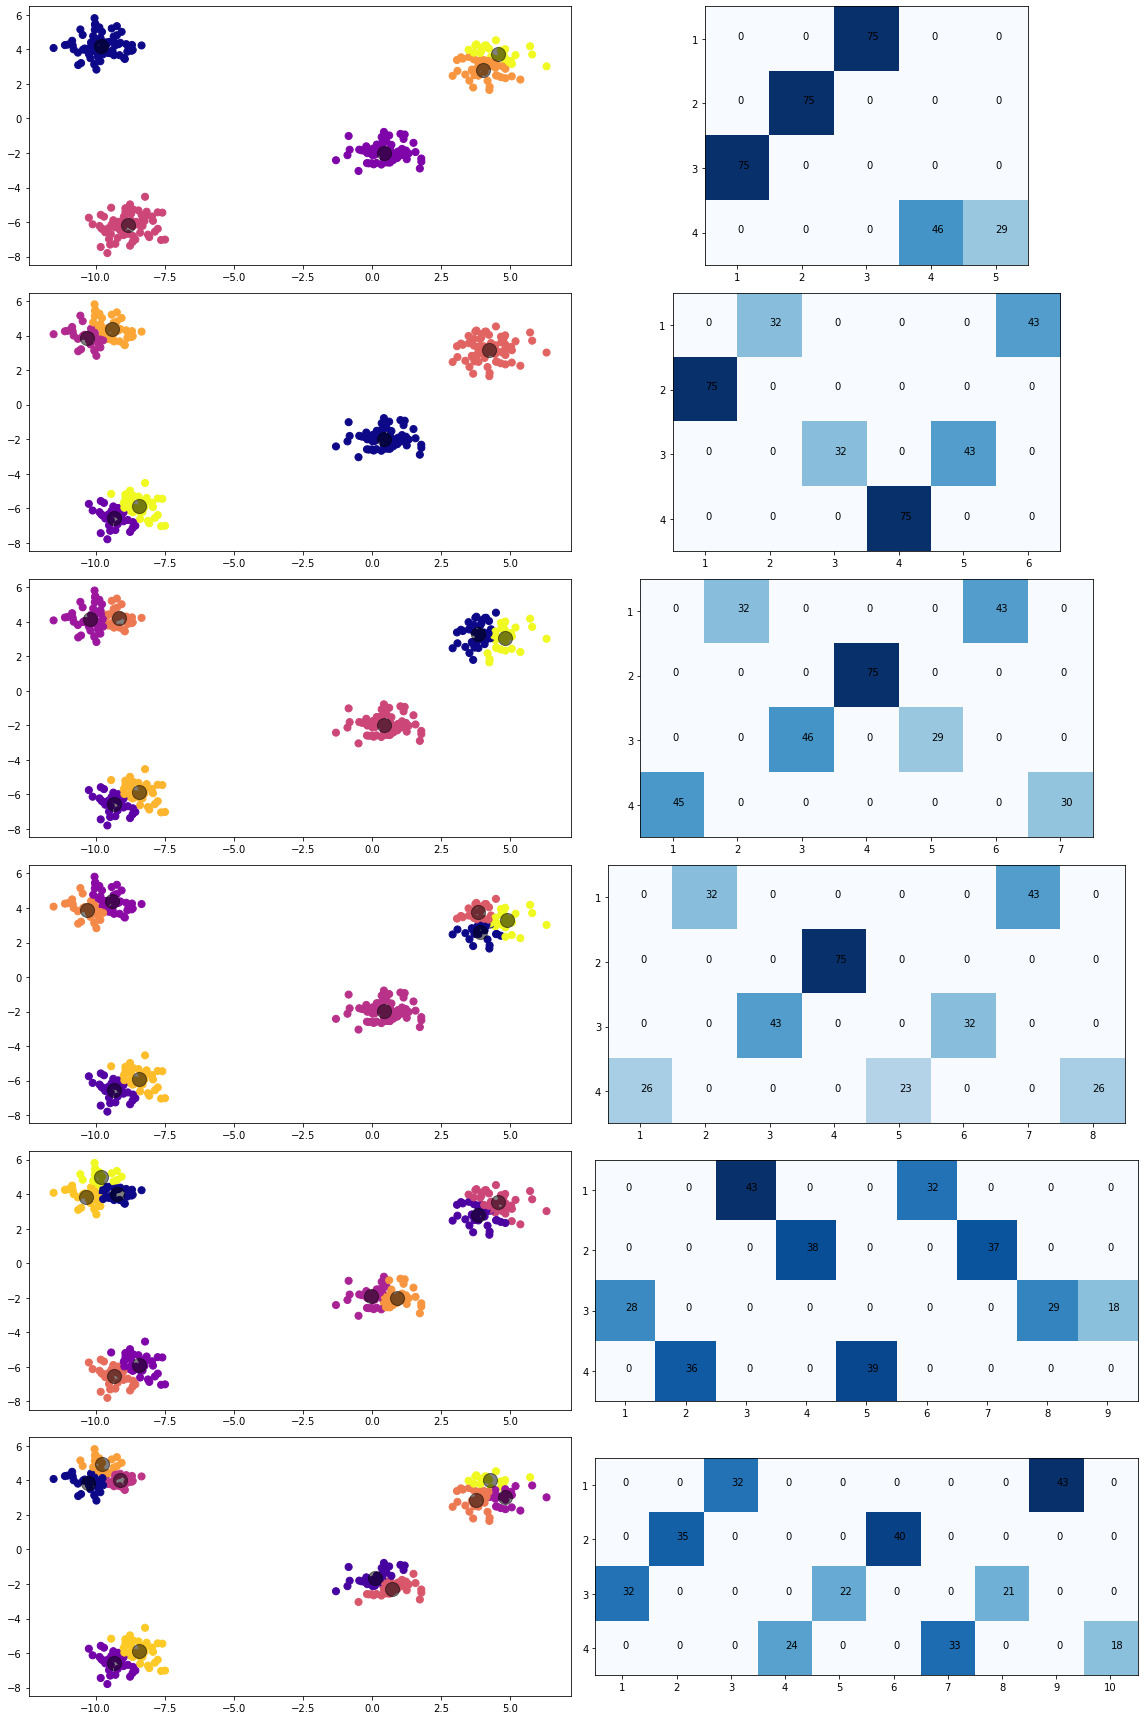

In [8]:
total_sse = performMultiKMeans(X,y,start=5,sse=total_sse);

Having a K > 4 means more clusters have to be labled than there are. This results in half of the being mislabled. This happend to k-4 clusters. With a k > 8 some clusterst are even 2/3 mislabled.

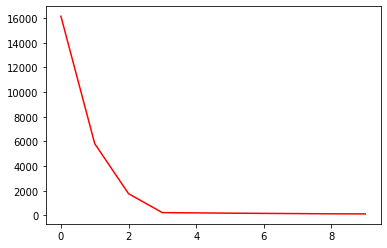

In [9]:
plt.plot(total_sse, color="red");

From 4 onwards ther is no improvment of the sse

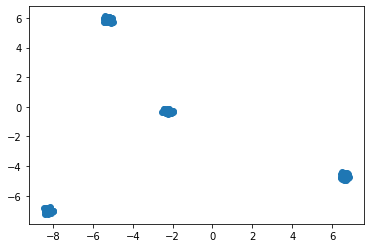

In [4]:
X, y = make_blobs(n_samples=[75,75,75,75],n_features=2, cluster_std=0.1)
plt.scatter(X[:,0],X[:,1]);

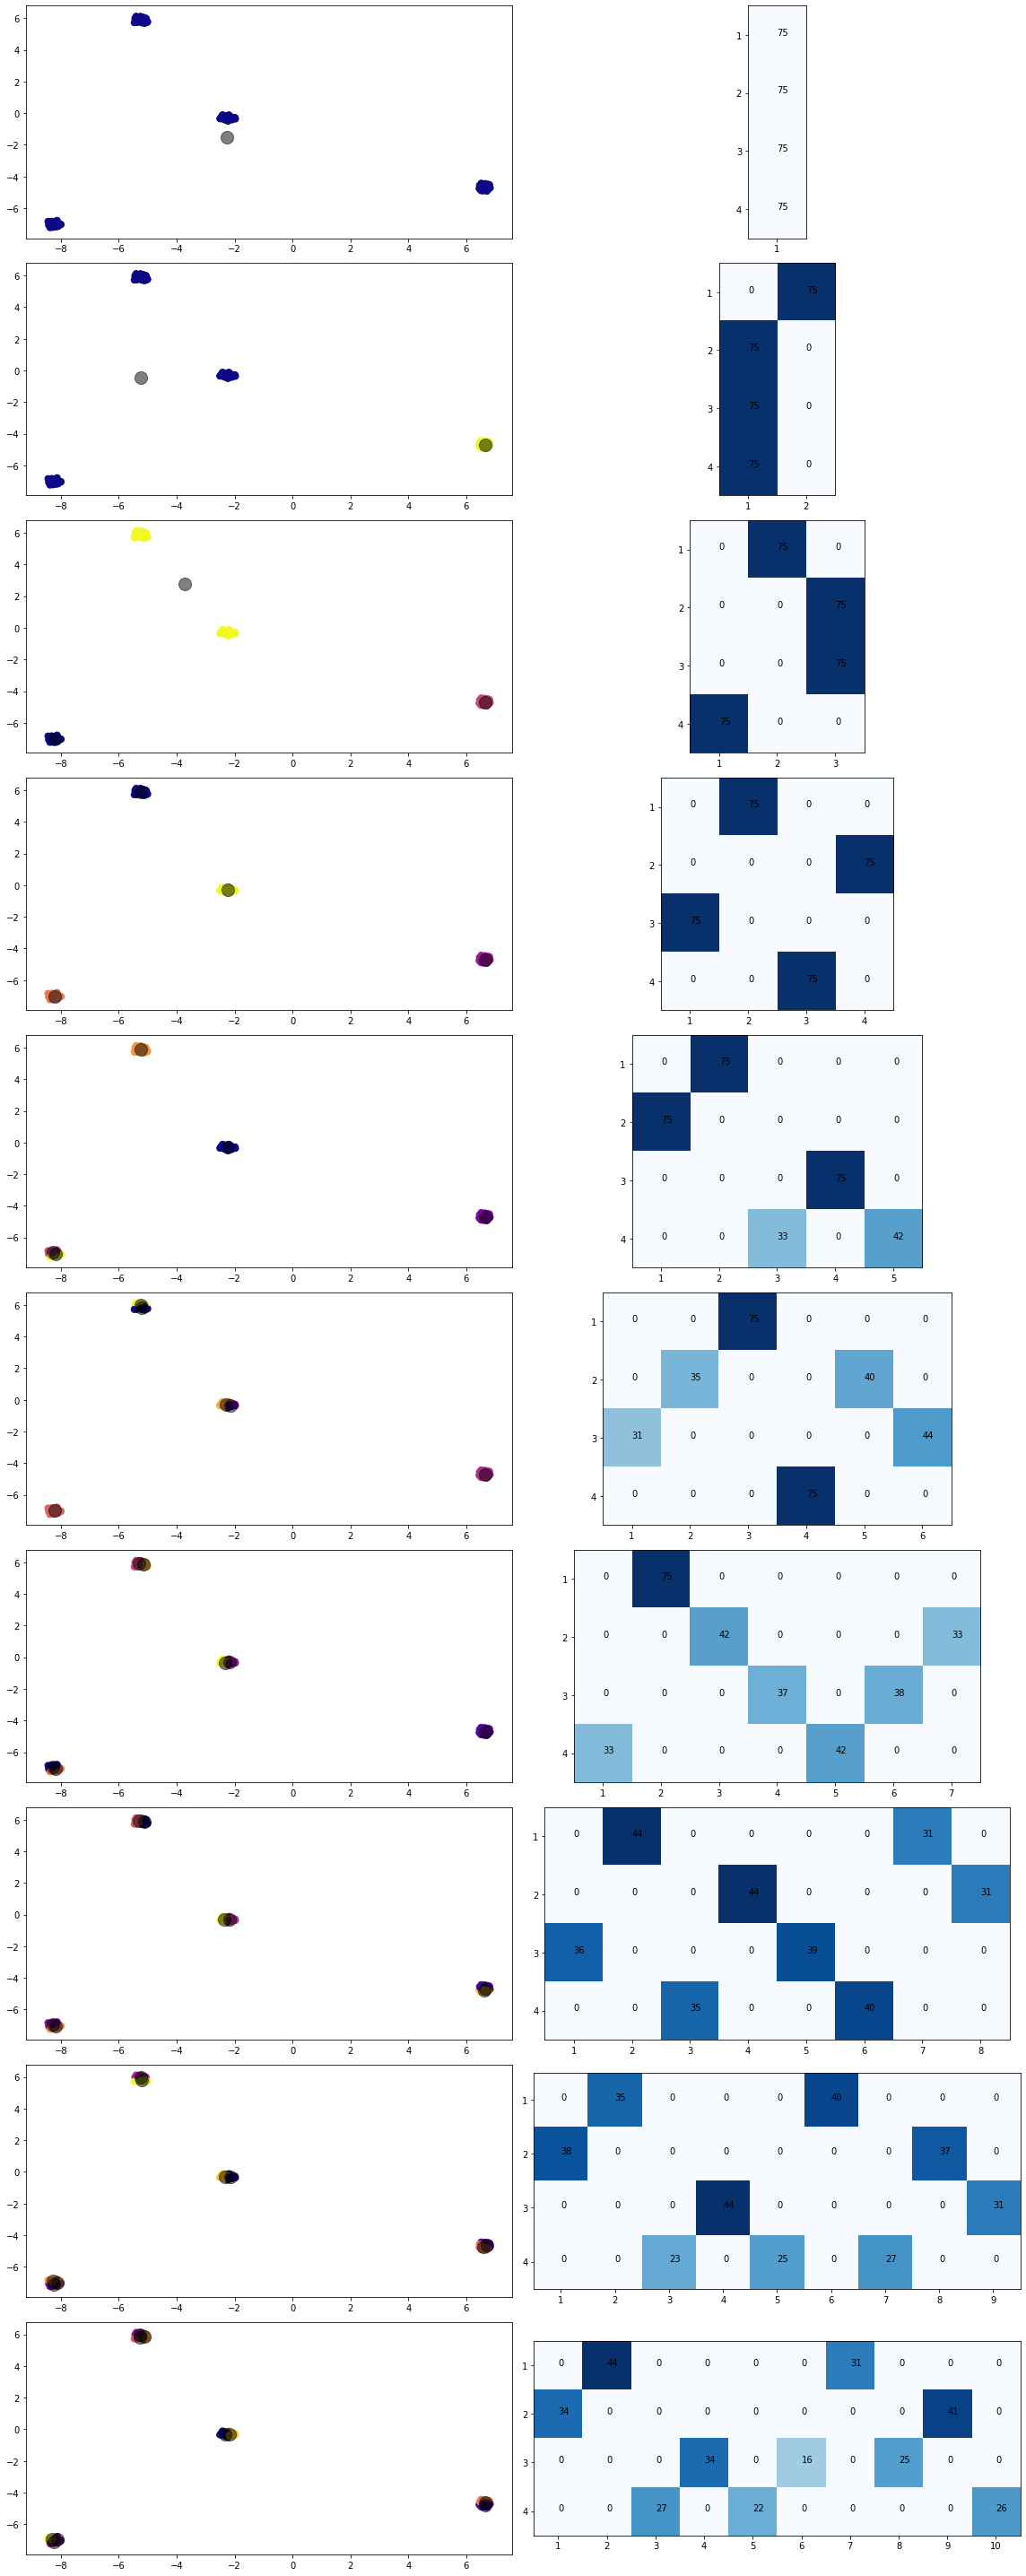

In [5]:
total_sse_2 = performMultiKMeans(X,y);

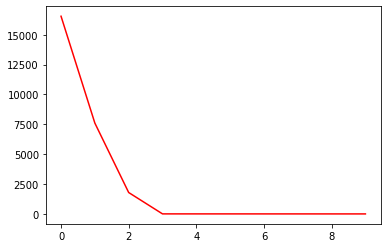

In [6]:
plt.plot(total_sse_2, color="red");

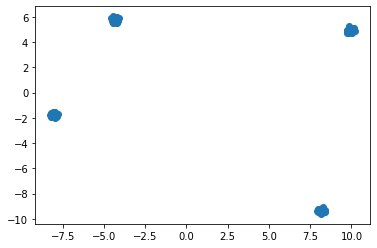

In [3]:
X, y = make_blobs(n_samples=[75,75,75,75],n_features=2, cluster_std=0.1)
plt.scatter(X[:,0],X[:,1]);

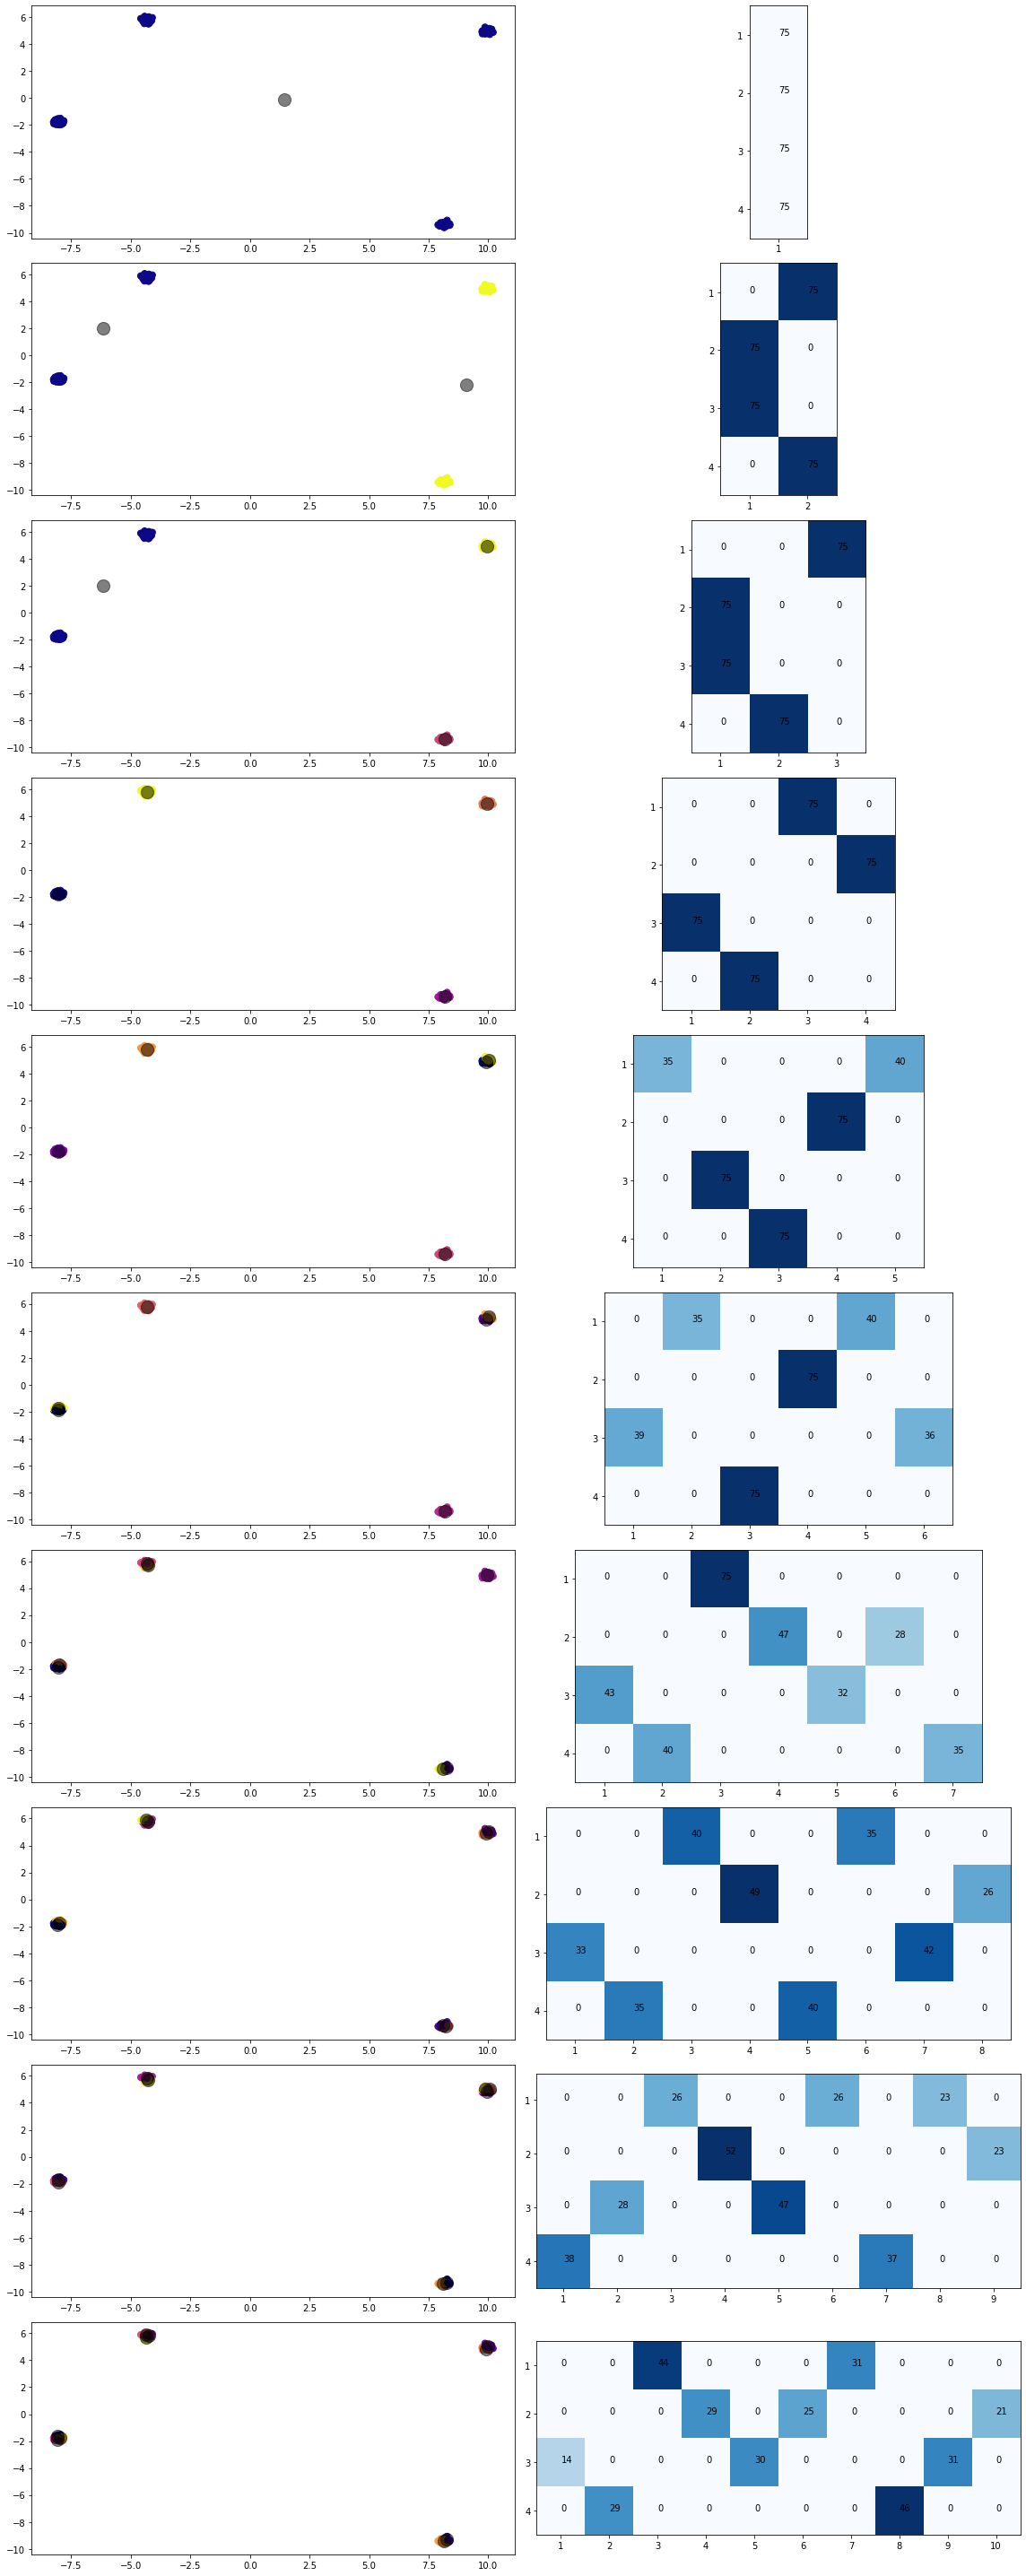

In [6]:
total_sse_3 = performMultiKMeans(X,y);

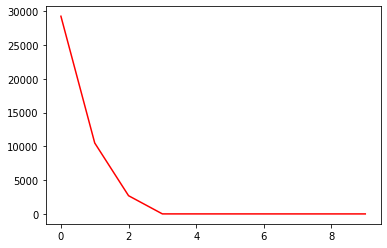

In [7]:
plt.plot(total_sse_3, color="red");

Different varaints in the dataset doesn't show any differents

# **Task 2**

In [8]:
df_vertebrate = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab4/vertebrate.csv')
X = df_vertebrate.loc[:,'Warm-blooded':'Hibernates'].to_numpy()
df_vertebrate.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


In [10]:
print(df_vertebrate)

             Name  Warm-blooded  Gives Birth  ...  Has Legs  Hibernates       Class
0           human             1            1  ...         1           0     mammals
1          python             0            0  ...         0           1    reptiles
2          salmon             0            0  ...         0           0      fishes
3           whale             1            1  ...         0           0     mammals
4            frog             0            0  ...         1           1  amphibians
5          komodo             0            0  ...         1           0    reptiles
6             bat             1            1  ...         1           1     mammals
7          pigeon             1            0  ...         1           0       birds
8             cat             1            1  ...         1           0     mammals
9   leopard shark             0            1  ...         0           0      fishes
10         turtle             0            0  ...         1           0    r

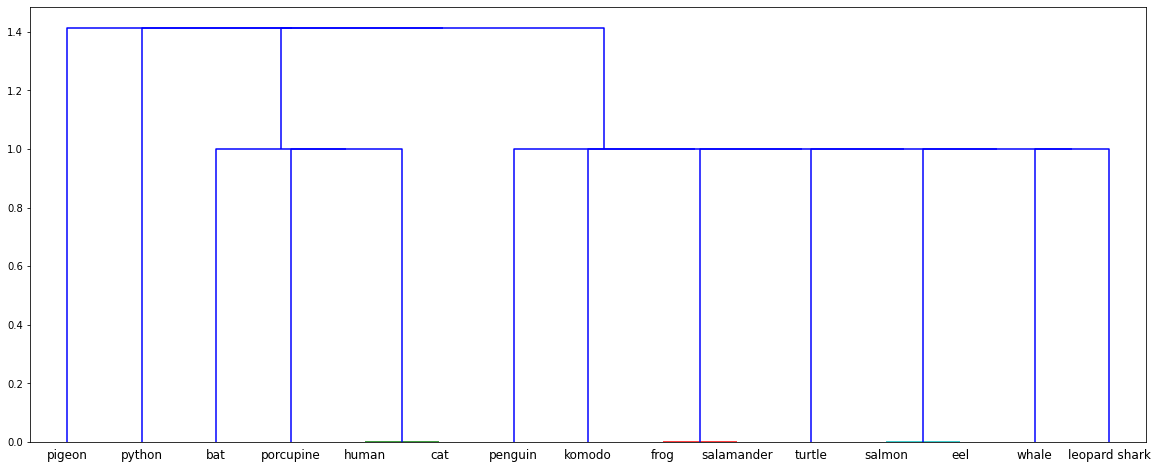

In [11]:
single_link = linkage(pdist(X), 'single')
fig = plt.figure(figsize=(20, 8))
dn = dendrogram(single_link,labels = df_vertebrate.loc[:,'Name'].to_numpy())
plt.show()

Single-Link is the worst linkage.

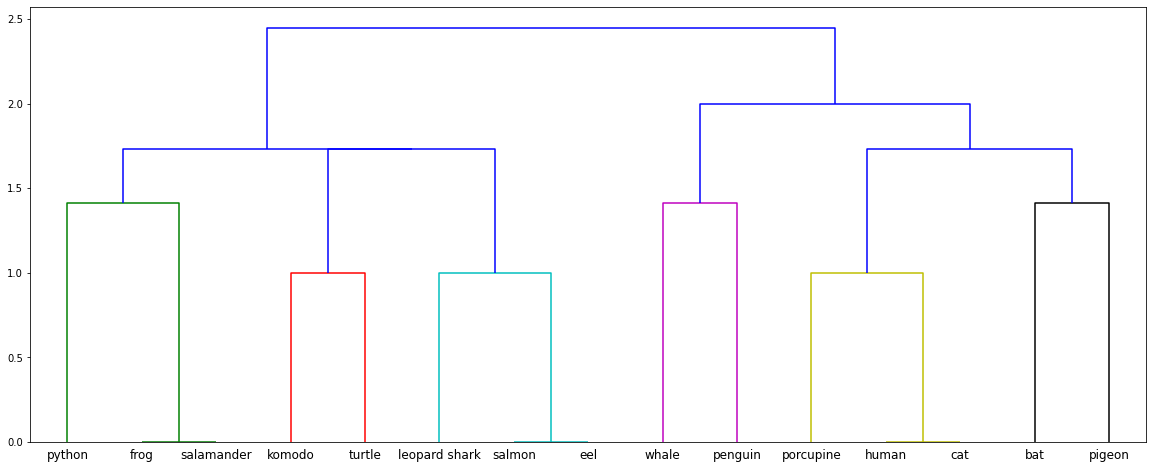

In [12]:
max_link = linkage(pdist(X), 'complete')
fig = plt.figure(figsize=(20, 8))
dn = dendrogram(max_link,labels = df_vertebrate.loc[:,'Name'].to_numpy())
plt.show()

Max-Link is alredy significantly better than Single-Link

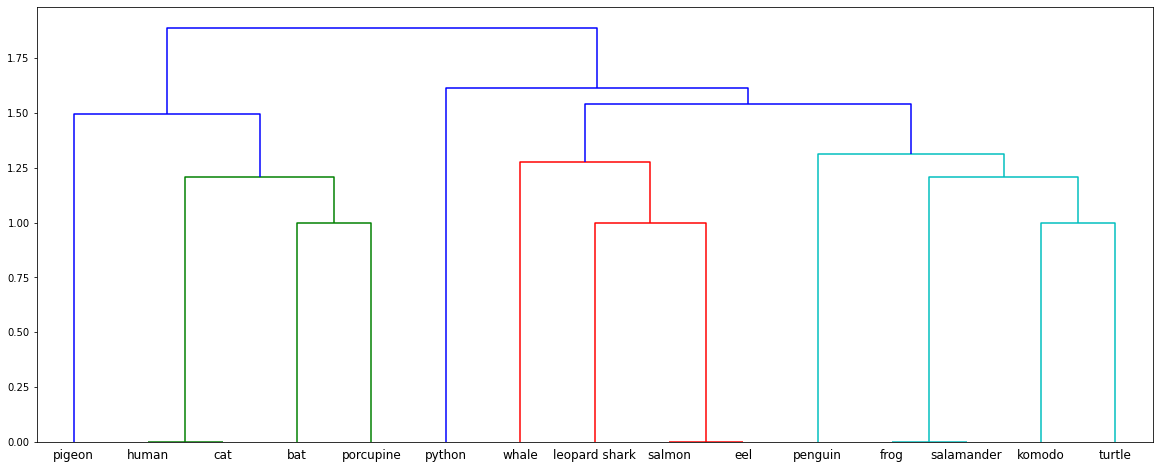

In [ ]:
average_link = linkage(pdist(X), 'average')
fig = plt.figure(figsize=(20, 8))
dn = dendrogram(average_link,labels = df_vertebrate.loc[:,'Name'].to_numpy())
plt.show()

Average-Link is the best variant as this variant links all mammals together

# **Task 3**

            x        y
0     650.914  214.888
1      41.767  179.408
2     509.126  233.749
3     486.403  152.427
4      46.883  367.904
...       ...      ...
1966  631.430  210.478
1967  187.652  247.923
1968  124.996  264.847
1969  522.511  302.785
1970  350.695  269.386

[1971 rows x 2 columns]


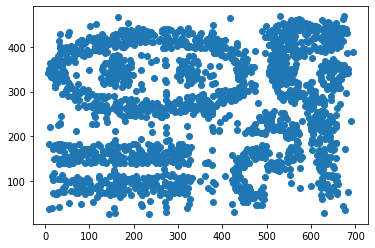

In [ ]:
df_chameleon = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab4/chameleon.csv')
df_chameleon.head()
print(df_chameleon)
plt.scatter(df_chameleon['x'],df_chameleon['y']);

In [ ]:
dbs = DBSCAN(eps=15.5, min_samples=5)
clustering = dbs.fit(df_chameleon)
clustering.labels_

array([4, 0, 1, ..., 3, 4, 3])

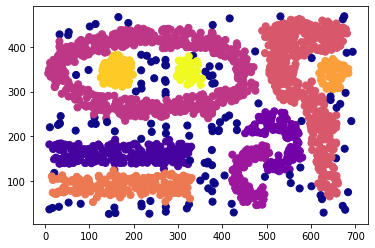

In [ ]:
plt.scatter(df_chameleon['x'], df_chameleon['y'], c=clustering.labels_, s=50, cmap='plasma')

Using DBSCAN with the given variables (eps=15.5, min_samples=5) returns decent results, with the main clusters clustered together.

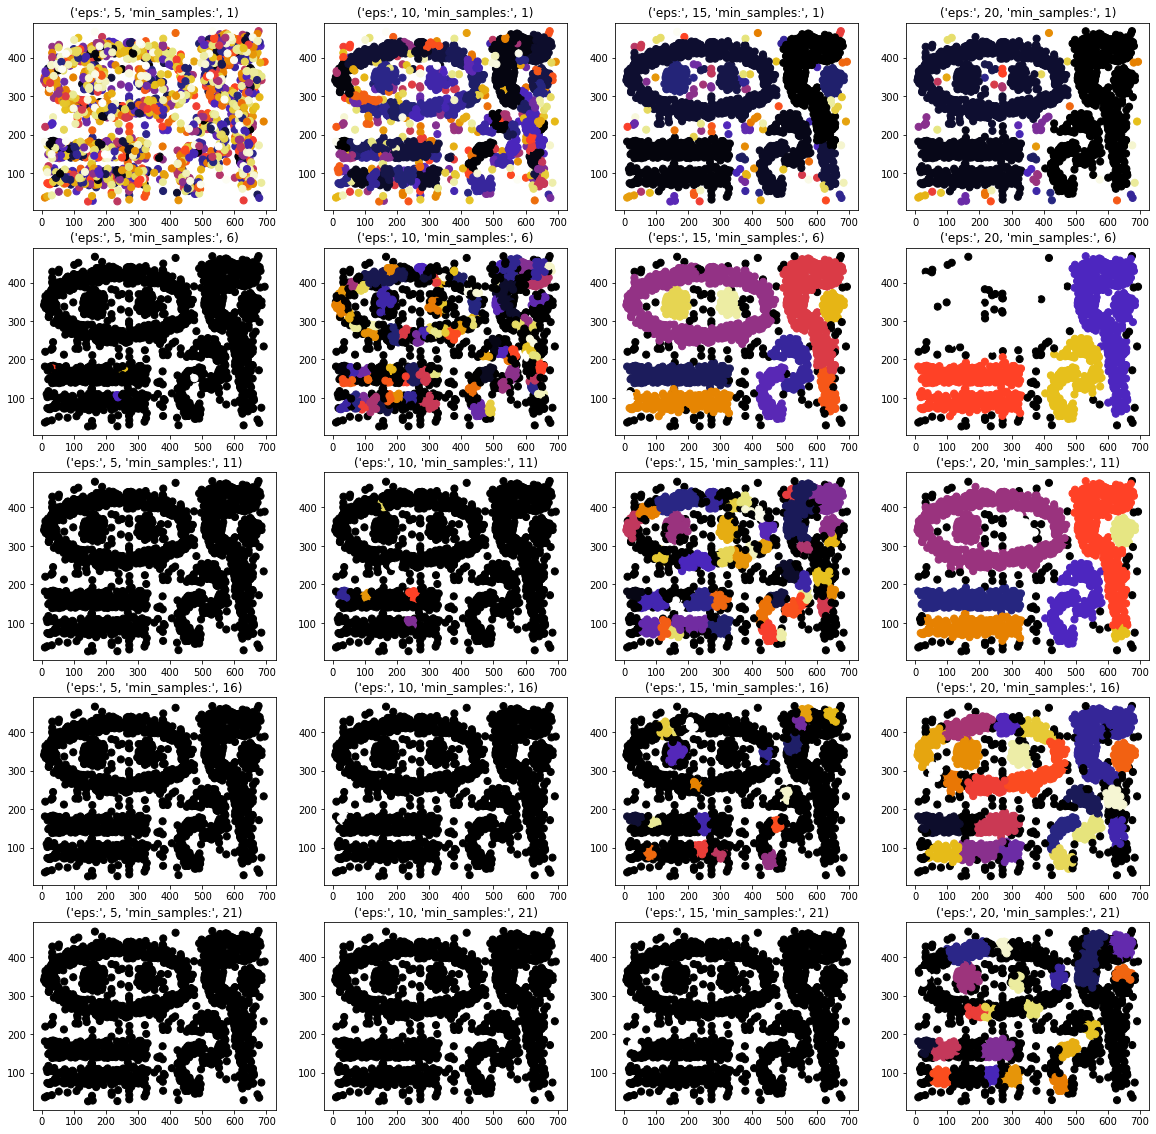

In [ ]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(4):
  for j in range(5):
    #print(i , "+" , j, "---",(i*5),"+",(j*5)+1)
    ak_eps = (i*5)+5
    ak_ms = (j*5)+1
    dbs = DBSCAN(eps=ak_eps, min_samples=ak_ms)
    clustering = dbs.fit(df_chameleon)
    axs[j,i].set_title(('eps:',ak_eps,'min_samples:', ak_ms))
    axs[j,i].scatter(df_chameleon['x'], df_chameleon['y'], c=clustering.labels_, s=50, cmap='CMRmap')

Testign DBSCAN with different variables shows different results. These results give some informations about the the ringe these varialbe have to be to improve the results:

The higher the eps the better the result (at least for the tested range). For every min_samples size a higher eps gives a more reasonable result.

The optimal min_samples size is 6 (at least form the testet combinations) here it isn't as simple as for eps, because for different eps the quality of the results not alwasy lead to 6. For an eps of 10 the min_samples size of 1 is better than that of 6. The higher the eps the better higher min_samples sizes can improve the results